# Gibbs Sampling

In [4]:
import random
def roll_a_die():
    return random.choice([1,2,3,4,5,6])

def direct_sample():
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2

direct_sample()

(6, 8)

In [156]:
def random_y_given_x(x):
    """equally likely to be x + 1, x + 2, ... , x + 6"""
    return x + roll_a_die()

def random_x_given_y(y):
    if y <= 7:
        # if the total is 7 or less, the first die is equally likely to be
        # 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
        # if the total is 7 or more, the first die is equally likely to be
        # (total - 6), (total - 5), ..., 6
        return random.randrange(y - 6, 7)

def gibbs_sample(num_iters=100):
    x, y = 1, 2 # doesn't really matter
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

gibbs_sample()

(3, 6)

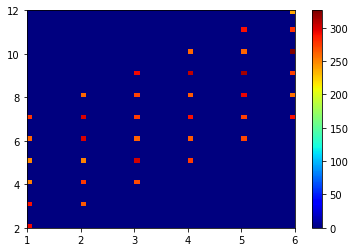

In [154]:
%matplotlib inline

import matplotlib.pyplot as plt

x = []
y = []

for _ in range(10000):
    i, j = gibbs_sample()
    x.append(i)
    y.append(j)
    
# plt.scatter(x, y)
plt.hist2d(x, y, bins=50, cmap=plt.cm.jet)
plt.colorbar()

In [155]:
from collections import defaultdict
def compare_distributions(num_samples=10000):
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1
    return counts

compare_distributions()

defaultdict(<function __main__.compare_distributions.<locals>.<lambda>>,
            {(1, 2): [256, 320],
             (1, 3): [288, 262],
             (1, 4): [260, 270],
             (1, 5): [306, 289],
             (1, 6): [277, 272],
             (1, 7): [260, 256],
             (2, 3): [291, 269],
             (2, 4): [259, 273],
             (2, 5): [293, 283],
             (2, 6): [292, 288],
             (2, 7): [289, 266],
             (2, 8): [264, 301],
             (3, 4): [260, 271],
             (3, 5): [264, 270],
             (3, 6): [279, 297],
             (3, 7): [274, 258],
             (3, 8): [292, 301],
             (3, 9): [277, 275],
             (4, 5): [296, 274],
             (4, 6): [283, 264],
             (4, 7): [258, 290],
             (4, 8): [257, 278],
             (4, 9): [259, 290],
             (4, 10): [290, 294],
             (5, 6): [269, 253],
             (5, 7): [276, 280],
             (5, 8): [267, 289],
             (5, 9): [286, 257],
  